<a href="https://colab.research.google.com/github/hamzajb95/CE888/blob/main/Lab8/transfer_learning_FE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
#unzip file
!unzip -u "/content/drive/MyDrive/data.zip"

Archive:  /content/drive/MyDrive/data.zip
   creating: data/
   creating: data/cats/
  inflating: data/cats/cat.1.jpg     
  inflating: data/cats/cat.10.jpg    
  inflating: data/cats/cat.100.jpg   
  inflating: data/cats/cat.101.jpg   
  inflating: data/cats/cat.102.jpg   
  inflating: data/cats/cat.103.jpg   
  inflating: data/cats/cat.104.jpg   
  inflating: data/cats/cat.105.jpg   
  inflating: data/cats/cat.106.jpg   
  inflating: data/cats/cat.107.jpg   
  inflating: data/cats/cat.108.jpg   
  inflating: data/cats/cat.109.jpg   
  inflating: data/cats/cat.11.jpg    
  inflating: data/cats/cat.110.jpg   
  inflating: data/cats/cat.111.jpg   
  inflating: data/cats/cat.112.jpg   
  inflating: data/cats/cat.113.jpg   
  inflating: data/cats/cat.114.jpg   
  inflating: data/cats/cat.115.jpg   
  inflating: data/cats/cat.116.jpg   
  inflating: data/cats/cat.117.jpg   
  inflating: data/cats/cat.118.jpg   
  inflating: data/cats/cat.119.jpg   
  inflating: data/cats/cat.12.jpg    
  i

In [ ]:
data_paths = [os.path.join(path, f) 
    for path, dirs, files in os.walk("/content/data") for f in files]

file_count = len(data_paths)
print(file_count)

NameError: ignored

In [ ]:
# Make new base directory
import os
original_dataset_dir = '/content/train'
base_dir = '/content/animals_small'
os.mkdir(base_dir)

In [ ]:
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

In [ ]:
import shutil
import math
fnames = ['rider-{}.jpg'.format(i) for i in range(100)]
for fname in fnames:
  try:
    src = os.path.join("/content/data/Humans", fname)
    dst = os.path.join(train_dir, fname)
    #print(src,dst)
    shutil.copyfile(src, dst)
  except Exception as e:
    pass
    
fnames = ['rider-{}.jpg'.format(i) for i in range(102, 153)]
for fname in fnames:
  try:
    src = os.path.join("/content/data/Humans", fname)
    dst = os.path.join(validation_dir, fname)
    shutil.copyfile(src, dst)
  except Exception as e:
    pass

fnames = ['rider-{}.jpg'.format(i) for i in range(153, 203)]
for fname in fnames:
  try:
    src = os.path.join("/content/data/Humans", fname)
    dst = os.path.join(test_dir, fname)
    shutil.copyfile(src, dst)
  except Exception as e:
    pass

fnames = ['cat.{}.jpg'.format(i) for i in range(100)]
for fname in fnames:
  try:
    src = os.path.join("/content/data/cats", fname)
    dst = os.path.join(train_dir, fname)
    #print(src,dst)
    shutil.copyfile(src, dst)
  except Exception as e:
    pass
    
fnames = ['cat.{}.jpg'.format(i) for i in range(102, 153)]
for fname in fnames:
  try:
    src = os.path.join("/content/data/cats", fname)
    dst = os.path.join(validation_dir, fname)
    shutil.copyfile(src, dst)
  except Exception as e:
    pass

fnames = ['cat.{}.jpg'.format(i) for i in range(153, 203)]
for fname in fnames:
  try:
    src = os.path.join("/content/data/cats", fname)
    dst = os.path.join(test_dir, fname)
    shutil.copyfile(src, dst)
  except Exception as e:
    pass
    
fnames = ['dog.{}.jpg'.format(i) for i in range(100)]
for fname in fnames:
  try:
    src = os.path.join("/content/data/dogs", fname)
    dst = os.path.join(train_dir, fname)
    shutil.copyfile(src, dst)
  except Exception as e:
    pass

fnames = ['dog.{}.jpg'.format(i) for i in range(102, 153)]
for fname in fnames:
  try:
    src = os.path.join("/content/data/dogs", fname)
    dst = os.path.join(validation_dir, fname)
    shutil.copyfile(src, dst)
  except Exception as e:
    pass

fnames = ['dog.{}.jpg'.format(i) for i in range(153, 203)]
for fname in fnames:
  try:
    src = os.path.join("/content/data/dogs", fname)
    dst = os.path.join(test_dir, fname)
    shutil.copyfile(src, dst)
  except Exception as e:
    pass

fnames = ['horse-{}.jpg'.format(i) for i in range(100)]
for fname in fnames:
  try:
    src = os.path.join("/content/data/horses", fname)
    dst = os.path.join(train_dir, fname)
    shutil.copyfile(src, dst)
  except Exception as e:
    pass

fnames = ['horse-{}.jpg'.format(i) for i in range(102, 153)]
for fname in fnames:
  try:
    src = os.path.join("/content/data/horses", fname)
    dst = os.path.join(validation_dir, fname)
    shutil.copyfile(src, dst)
  except Exception as e:
    pass

fnames = ['horse-{}.jpg'.format(i) for i in range(153, 203)]
for fname in fnames:
  try:
    src = os.path.join("/content/data/horses", fname)
    dst = os.path.join(test_dir, fname)
    shutil.copyfile(src, dst)
  except Exception as e:
    pass

In [ ]:
import cv2
import numpy as np
from random import shuffle

IMG_SIZE = 224
LR = 1e-4

In [ ]:
def label_img(img):
    word_label = img.split('.')[0]
    word_label1 = img.split('-')[0]
    if word_label == 'dog': return [1, 0, 0, 0]
    elif word_label == 'cat': return [0, 1, 0, 0]
    elif word_label1 == 'horse': return [0, 0, 1, 0]
    elif word_label1 == 'rider': return [0, 0, 0, 1]

In [ ]:
def createDataSplitSet(datapath):
    X=[]
    y=[]

    for img in os.listdir(datapath):
        label = label_img(img)
        # print(label)
        path = os.path.join(datapath, img)
        image = cv2.resize(cv2.imread(path), (IMG_SIZE, IMG_SIZE))
        image = cv2.normalize(image, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)

        X.append(np.array(image))
        y.append(label)

    return np.array(X), np.array(y)

In [ ]:
train_X, train_y = createDataSplitSet(train_dir)
val_X, val_y = createDataSplitSet(validation_dir)
test_X, test_y = createDataSplitSet(test_dir)

In [ ]:
## VGG 16
from tensorflow.keras.applications import Xception
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import Model

img_input = Input(shape=(IMG_SIZE, IMG_SIZE, 3))

In [ ]:
from keras.models import Model
from tensorflow import keras
from keras.layers import Dropout
from keras.layers import GlobalAveragePooling2D
base_model = Xception(input_shape=(224, 224, 3), weights='imagenet', include_top=False) #False - define model and extract features from the train dataset using the VGG16 pre-trained model
#base_model.trainable = False #freeze all layers in the base_model

input = keras.Input(shape=(224, 224, 3))
x = base_model(input) #make sure base_model is running in inference mode

# add additional layers
x = GlobalAveragePooling2D()(x) #convert features to vectors
x = Dense(512, activation='relu')(x) 
x = Dropout(0.5)(x) 
output = Dense(4, activation='softmax')(x) #4 classes

for layer in base_model.layers[:-1]:
	layer.trainable = False

# add layer to the pre-trained base_model
model = Model(input, output)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
xception (Functional)        (None, 7, 7, 2048)        20861480  
_________________________________________________________________
global_average_pooling2d_2 ( (None, 2048)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               1049088   
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 2052      
Total params: 21,912,620
Trainable params: 1,051,140
Non-trainable params: 20,861,480
_______________________________________

In [ ]:
for i, layer in enumerate(base_model.layers):         
  print(i, layer.name)

0 input_7
1 block1_conv1
2 block1_conv1_bn
3 block1_conv1_act
4 block1_conv2
5 block1_conv2_bn
6 block1_conv2_act
7 block2_sepconv1
8 block2_sepconv1_bn
9 block2_sepconv2_act
10 block2_sepconv2
11 block2_sepconv2_bn
12 conv2d_8
13 block2_pool
14 batch_normalization_8
15 add_24
16 block3_sepconv1_act
17 block3_sepconv1
18 block3_sepconv1_bn
19 block3_sepconv2_act
20 block3_sepconv2
21 block3_sepconv2_bn
22 conv2d_9
23 block3_pool
24 batch_normalization_9
25 add_25
26 block4_sepconv1_act
27 block4_sepconv1
28 block4_sepconv1_bn
29 block4_sepconv2_act
30 block4_sepconv2
31 block4_sepconv2_bn
32 conv2d_10
33 block4_pool
34 batch_normalization_10
35 add_26
36 block5_sepconv1_act
37 block5_sepconv1
38 block5_sepconv1_bn
39 block5_sepconv2_act
40 block5_sepconv2
41 block5_sepconv2_bn
42 block5_sepconv3_act
43 block5_sepconv3
44 block5_sepconv3_bn
45 add_27
46 block6_sepconv1_act
47 block6_sepconv1
48 block6_sepconv1_bn
49 block6_sepconv2_act
50 block6_sepconv2
51 block6_sepconv2_bn
52 block6_

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['acc'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
my_callbacks = [
    EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True),
    ModelCheckpoint(filepath='vgg16_model.h5', save_best_only=True),
]

In [ ]:
history = model.fit(train_X, train_y,
                               batch_size=10,
                               epochs=10, 
                               validation_data=(val_X, val_y),
                               callbacks=my_callbacks)

Epoch 1/10
40/40 [==============================] - 5s 60ms/step - loss: 0.3416 - acc: 0.7291 - val_loss: 0.0361 - val_acc: 0.9861
Epoch 2/10
40/40 [==============================] - 2s 42ms/step - loss: 0.1008 - acc: 0.9582 - val_loss: 0.0209 - val_acc: 0.9907
Epoch 3/10
40/40 [==============================] - 2s 43ms/step - loss: 0.0366 - acc: 0.9866 - val_loss: 0.0246 - val_acc: 0.9907
Epoch 4/10
40/40 [==============================] - 2s 42ms/step - loss: 0.0210 - acc: 0.9931 - val_loss: 0.0172 - val_acc: 0.9954
Epoch 5/10
40/40 [==============================] - 2s 42ms/step - loss: 0.0112 - acc: 1.0000 - val_loss: 0.0192 - val_acc: 0.9861
Epoch 6/10
40/40 [==============================] - 2s 41ms/step - loss: 0.0053 - acc: 1.0000 - val_loss: 0.0161 - val_acc: 0.9861
Epoch 7/10
40/40 [==============================] - 2s 43ms/step - loss: 0.0038 - acc: 1.0000 - val_loss: 0.0142 - val_acc: 0.9861
Epoch 8/10
40/40 [==============================] - 2s 42ms/step - loss: 0.0078 - a

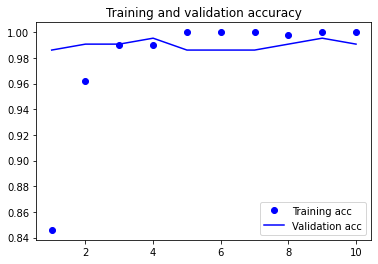

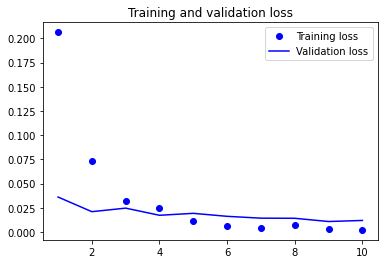

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

## Test Accuracy
predictions = model.predict(test_X)
ypred = predictions > 0.5
test_acc = accuracy_score(test_y, ypred)

from sklearn.metrics import precision_recall_fscore_support, roc_auc_score

precision, recall, f1score, _ = precision_recall_fscore_support(test_y, ypred, average='macro')

auc = roc_auc_score(test_y, ypred)

print("Train Accuracy:\t", acc[-1])
print("Val Accuracy:\t", val_acc[-1])
print("Test Accuracy:\t", test_acc)
print("Precision:\t", precision)
print("Recall:\t\t", recall)
print("F1 Score:\t", f1score)
print("AUC:\t\t", auc)

Train Accuracy:	 1.0
Val Accuracy:	 0.9907407164573669
Test Accuracy:	 0.98
Precision:	 0.980580693815988
Recall:		 0.98
F1 Score:	 0.9799403378785423
AUC:		 0.9866666666666666
